In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

from pathlib import Path

Set results file and load the pandas dataframe of results

In [2]:
results_file = Path('./results/nz_results.csv')

results_df = pd.read_csv(results_file)

Filter out results in the dataframe using regex. In this case we are filtering out for only universities.

In [3]:
pattern = r'university|University'

filter = results_df['institution'].str.contains(pattern, regex=True)

results_df = results_df[filter]

Make a nice dict for plotting results

In [4]:
results_df

,institution,ror,year,count,oa status
0,University of Auckland,https://ror.org/03b94tp07,2022,2706,closed
1,University of Auckland,https://ror.org/03b94tp07,2022,1416,gold
2,University of Auckland,https://ror.org/03b94tp07,2022,867,hybrid
3,University of Auckland,https://ror.org/03b94tp07,2022,704,green
4,University of Auckland,https://ror.org/03b94tp07,2022,289,bronze
...,...,...,...,...,...
85,Lincoln University,https://ror.org/04ps1r162,2023,157,closed
86,Lincoln University,https://ror.org/04ps1r162,2023,127,hybrid
87,Lincoln University,https://ror.org/04ps1r162,2023,113,gold
88,Lincoln University,https://ror.org/04ps1r162,2023,39,bronze


In [20]:
journal_stats = {}
color_dict = {}

institutions = results_df['institution'].unique()
oa_status = results_df[' oa status '].unique()

# create the dictionary with open access as the keys and
for oa in oa_status:
    journal_stats[oa] = []
    color_dict[oa] = 0
    
for institution in institutions:
    subdf = results_df[results_df['institution'] == institution]
    subdf = subdf[subdf[' year'] == 2023]
    oa_status = subdf[' oa status '].values
    counts = subdf[' count'].values
    max_counts = np.sum(counts)
    for i, oa in enumerate(oa_status):
        journal_stats[oa].append(counts[i]/max_counts)

Make a bar graph based on the number of oa status for each year and institution

In [21]:
color_dict

{'closed': 0, 'gold': 0, 'hybrid': 0, 'green': 0, 'bronze': 0}

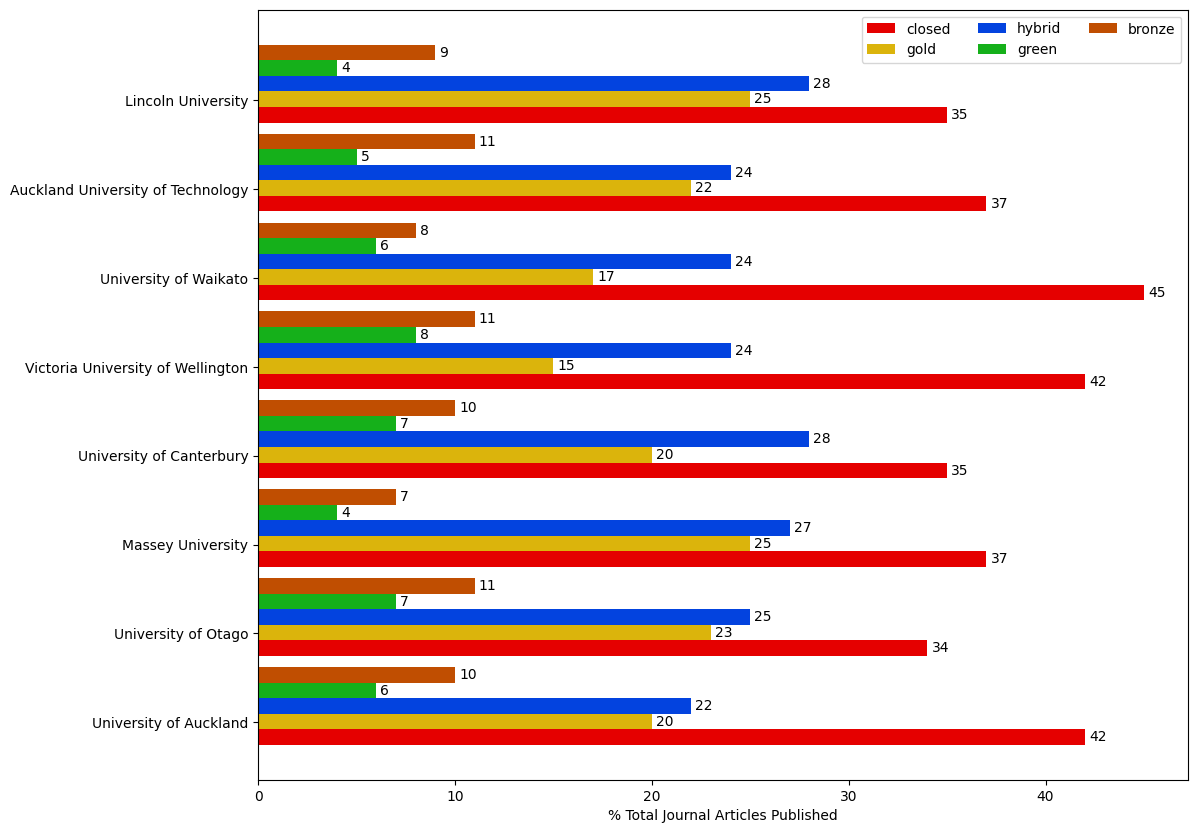

In [25]:
figsize_x, figsize_y = 12, 10
fig1, ax1 = plt.subplots(figsize=(figsize_x, figsize_y), facecolor='w')

x = np.arange(len(institutions))  # the label locations
width = 0.175  # the width of the bars
multiplier = 0

# create a color dict for the bars
color_dict = {'closed':'xkcd:red', 'gold':'xkcd:gold', 'hybrid':'xkcd:blue', 'green':'xkcd:green', 'bronze':'xkcd:burnt orange'}

for oa, count in journal_stats.items():
    offset = width * multiplier + 0.01
    rects = ax1.barh(x + offset, np.round(count,2)*100, width, color=color_dict[oa], label=oa)
    ax1.bar_label(rects, padding=3)
    multiplier += 1


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('% Total Journal Articles Published')
ax1.set_yticks(x + width, institutions)
ax1.legend(loc='upper right', ncols=3) 

fig1.savefig('normalized-journal-outputs.pdf', dpi=300, bbox_inches='tight')